In [61]:
# 라이브러리 설치
! pip install selenium


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# selenium 라이브러리
1. 웹 어플리케이션 테스트를 위한 라이브러리
2. python을 이용하여 웹 브라우저를 제어하는 기능
3. 웹드라이버라는 별도의 프로그램 설치

In [62]:
# 라이브러리 로드
from selenium import webdriver

In [97]:
# webdriver 파일의 위치 지정
# 상대경로
path = "../chromedriver"
# 절대경로
path2 = "C:\\Users\\Kim Taemin\\Documents\\GitHub\\python-class\\chromedriver.exe"

In [116]:
# 웹드라이버 실행
driver = webdriver.Chrome(path)
# 웹드라이버에 주소창에 네이버 요청
driver.get("https://www.naver.com")

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_18512\1093743029.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [108]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [109]:
element = driver.find_element(By.ID, "query")
element.send_keys("하이디라오")

In [110]:
element.send_keys(Keys.ENTER)

In [68]:
from bs4 import BeautifulSoup as bs

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/111.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="하이디라오 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'하이디라오\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'하이디라오\'의 네이버 통합검색 결과입니다."> <title>하이디라오 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="style
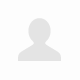
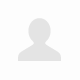
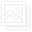
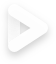
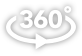
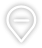
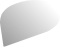
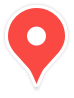

In [113]:
driver.page_source

In [112]:
soup = bs(driver.page_source, "html.parser")

In [ ]:
soup

In [72]:
div_list = soup.find_all("div", attrs = {
    "class" : "question_group"
})
div_list

[<div class="question_group"> <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=8020603&amp;docId=440718964&amp;qb=7ZWY7J2065SU65287Jik&amp;enc=utf8&amp;section=kin.ext&amp;rank=1&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=1&amp;i=10000009_00001a44d674&amp;u='+urlencode(this.href));" target="_blank"><mark>하이디라오</mark> 매실 <mark>하이디라오</mark>에서 주는 매실 이거 맞나요?</a> </div>,
 <div class="question_group"> <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=8020604&amp;docId=436775032&amp;qb=7ZWY7J2065SU65287Jik&amp;enc=utf8&amp;section=kin.ext&amp;rank=2&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=2&amp;i=10000009_00001a08a878&amp;u='+urlencode(this.href));" target="_blank">북앤라이프 도서문화상품권 <mark>하이디라오</mark> 쓸 수 있나요?</a> </div>,
 <div class="question_group"> <a class="api_txt_lines question_text" href="https://kin.nave

In [73]:
# a 태그만 리스트의 형태로 출력
a_list = []
for i in div_list :
    if i.find("a") :
        print(i.find("a").get_text())
        a_list.append(i.find("a").get_text())

a_list

하이디라오 매실 하이디라오에서 주는 매실 이거 맞나요?
북앤라이프 도서문화상품권 하이디라오 쓸 수 있나요?
홍대 하이디라오 룸 예약할 때 최소인원이나 이용제한 시간 있나요?


['하이디라오 매실 하이디라오에서 주는 매실 이거 맞나요?',
 '북앤라이프 도서문화상품권 하이디라오 쓸 수 있나요?',
 '홍대 하이디라오 룸 예약할 때 최소인원이나 이용제한 시간 있나요?']

In [74]:
# 함수 생성
# 검색어를 매개변수로 받아와서
# 웹드라이버에서 검색을 하고 결과를 리스트의 형태로 리턴
# 결과는 지식인의 타이틀을 리스트화 한 결과

# 1. 함수 생성

# 2. 웹드라이버에 검색어를 입력

# 3. 웹드라이버에서 엔터키를 입력

# 4. 페이지의 소스코드를 변수에 입력

# 5. bs를 이용하여 html parsing

# 6. parsing된 데이터에서 지식인 부분 출력

# 7. a태그 안에 text들을 리스트 형태로 저장

# 8. text_list를 리턴

In [75]:
import time

In [117]:
# 1. 함수 생성
def search_text(_search) :
    element = driver.find_element(By.ID, "query")
    # 2. 웹드라이버에 검색어를 입력
    element.send_keys(_search)
    # 3. 웹드라이버에서 엔터키를 입력
    element.send_keys(Keys.ENTER)
    # 딜레이 1초
    time.sleep(1)
    # 4. 페이지의 소스코드를 변수에 입력
    driver.page_source
    # 5. bs를 이용하여 html parsing
    data = bs(driver.page_source, "html.parser")
    # 6. parsing된 데이터에서 지식인 부분 출력
    div_list = data.find_all("div", attrs = {
        "class" : "question_group"
    })
    # 7. a태그 안에 text들을 리스트 형태로 저장
    search_list = []
    for i in div_list :
        if i.find("a") :
            search_list.append(i.find("a").get_text())
    # 8. text_list를 리턴 
    return search_list

In [120]:
search_text("주식")

['중학생 주식 안녕하세요 올해 중2가 되는 학생입니다. 주식을 한번 시작해보고싶어서 질문드립니다 1. 일단 뭐부터 공부해야할까요?? 주식용어들은 좀 알고있어요 2. 공부를 어떤걸로 해야할까요? 주식책을 읽어야할까요? 3. 여러가지 주식관련한 조언 부탁드립니다!!',
 '주식 개인회생 주식으로 인해 빚 주식 개인회생 문의합니다. 2억 정도 물려있고 지금 주식은 4천만 원 주식 개인회생신청이 가능할지, 개인회생 주식 보유는 가능한지. 주식으로 인해 빚이 생겼났는데. 이 빚들 처리가 가능할지. 알고 싶습니다. 주식 개인회생. 주식 보유 유무. 자격요건 등등. 내용 확인해주세요.',
 '주식 배당금? 제가 주식 어떤 종목을 2022년 여름 때부턴가 매수하고 가지고 있었어요. 그리고 그 주식 배당락일을 보니 2022년... 그런데 제가 1월 4일에 그 주식을 다 매도를 했어요. 그런데도 그 주식 배당금을... 배당금이 어디로 들어 오나요? 제가 앱증권으로 주식하는 앱 주식 예수금으로 입금 되나요?']

In [90]:
# 클래스 형태로 웹드라이버 제어

# 클래스 선언
class Web() :
    # 생성자 함수 생성
    def __init__(self, _url, _input) :
        self.url = _url
        self.input = _input

    # 검색을 하는 함수
    def search(self, _search) :
        # 웹드라이버를 실행
        self.path = "../chromedriver"
        self.driver = webdriver.Chrome(self.path)
        # url 주소로 접속
        self.driver.get(self.url)
        time.sleep(1)
        # 검색어창 지정
        self.element = self.driver.find_element(By.ID, self.input)
        # 검색어 입력
        self.element.send_keys(_search)
        # 엔터키를 입력
        self.element.send_keys(Keys.ENTER)
        time.sleep(1)
        # 해당 페이지의 html parsing 데이터
        self.soup = bs(self.driver.page_source, "html.parser")
        # 지식인 부분의 html 태그를 저장
        self.div_list = self.soup.find_all("div", attrs = {
            "class" : "question_group"
        })
        # div_list에서 a태그의 title text만 리스트의 형태로 출력
        self.result = []
        for i in self.div_list :
            if i.find("a") :
                self.result.append(i.find("a").get_text())
        self.driver.close()
        return self.result        



In [91]:
test = Web("https://www.naver.com", "query")

In [92]:
test.search("파싱")

C:\Users\Kim Taemin\AppData\Local\Temp\ipykernel_18512\1812056054.py:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  self.driver = webdriver.Chrome(self.path)


['파이썬 파싱이 뮈에요? 파싱이 뭐죠? 예시도 보여주세요 ㅜㅜ',
 '프로그램 파싱이란 게 뭘까요?',
 '파싱 리튬 배터리 수리 가능한가요 파싱 FS-970N 배터리 물리적 충격으로 접합부쪽 뚜껑이 분리됐어요 ㅠㅠ 다시 닫아서 테이프로 감아봐도 안되던데, 수리가 가능한가요? 정식 수입 업체에서는 배터리 소모품이라 수리가 어렵다고해서 사설로 가능한지 알아보고싶은데 정보가 없네요 ..']